In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('../data/ml_project1_data.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Clean

In [4]:
df.drop(['Z_CostContact', 'Z_Revenue', 'ID', 'Dt_Customer'], axis = 1, inplace = True)

In [5]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [6]:
df.dropna(inplace=True)

# Distribution 

In [7]:
numerical_columns = df.drop(['Education', 'Marital_Status'],axis = 1)
categorical_columns = df[['Education', 'Marital_Status']]

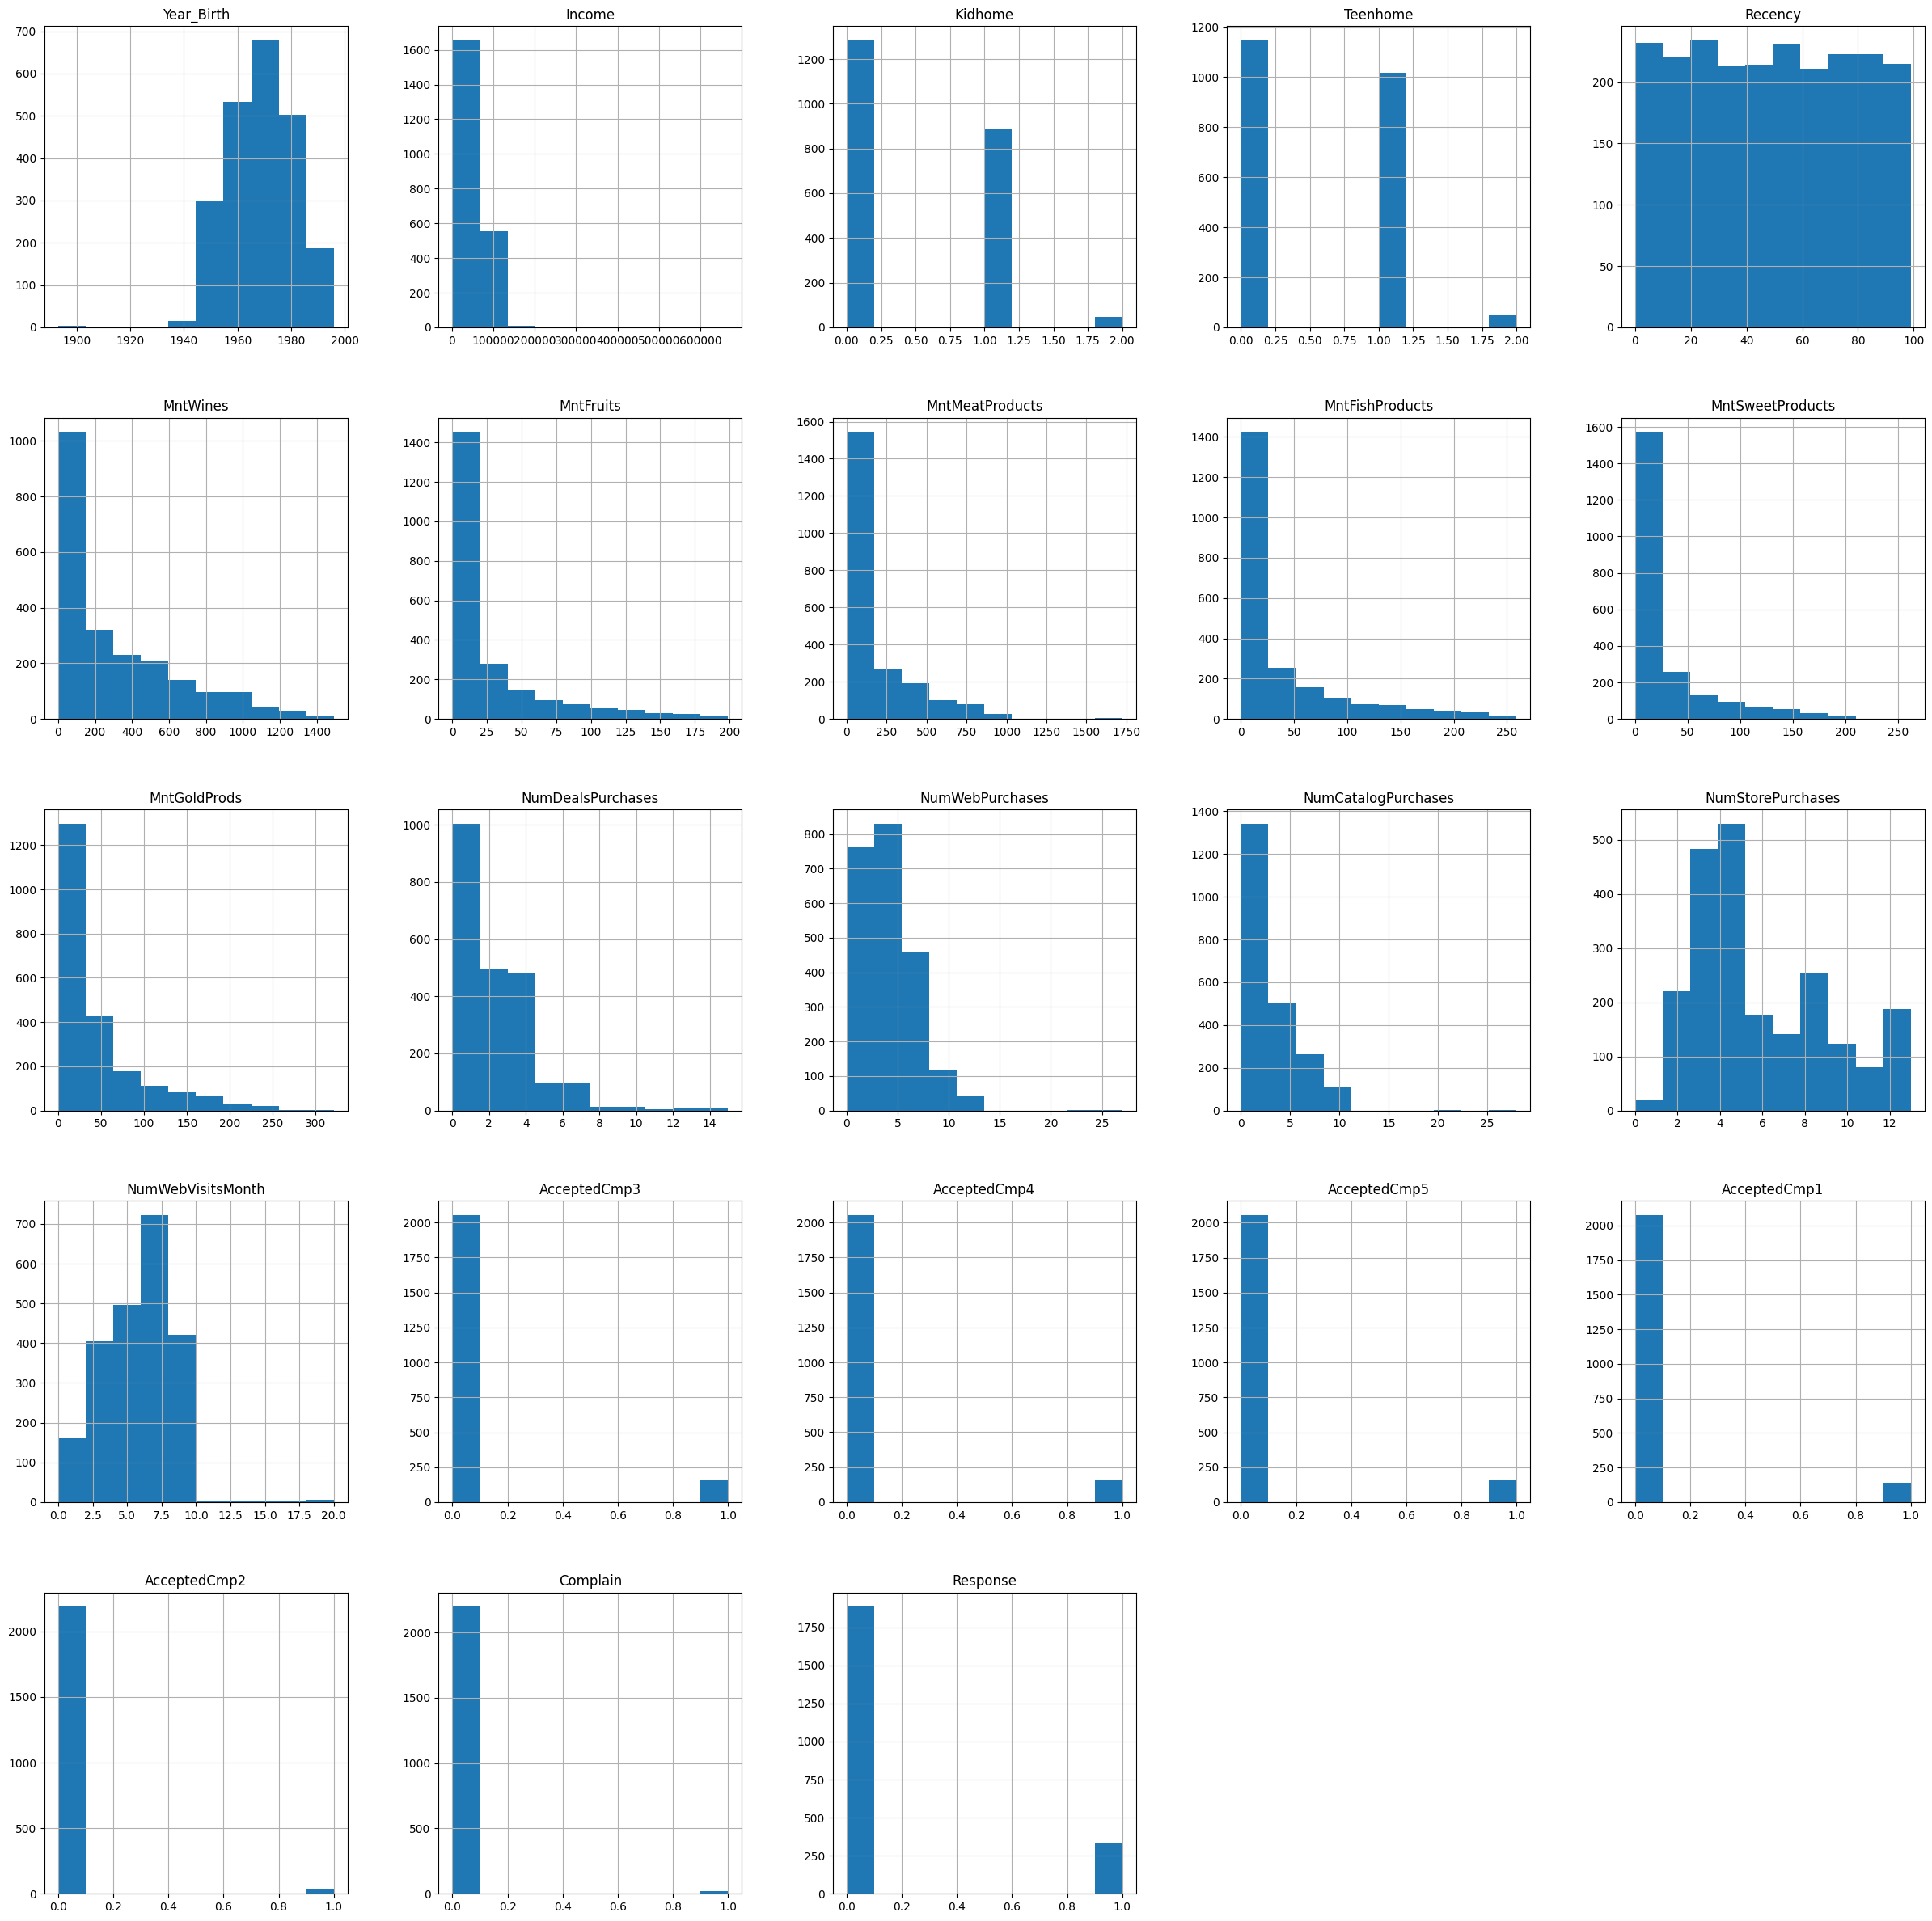

<Figure size 640x480 with 0 Axes>

In [8]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(30,30))

plt.figure()
for i,column in enumerate(numerical_columns.columns):
    row = i // 5
    col = i % 5
    df.hist(column, ax =axes[row][col]) 
    
plt.delaxes(ax=axes[4][4]) 
plt.delaxes(ax=axes[4][3]) 
plt.tight_layout()
plt.show()

## Outliers

In [9]:
df['Age'] = df['Year_Birth'].apply(lambda x: 2020-x)
df.drop(['Year_Birth'], axis = 1, inplace = True)

In [10]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,51.179603
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,127.000000


In [11]:
features = ['Income', 'MntWines', 'NumWebPurchases', 'NumWebVisitsMonth', 'Age']

In [12]:
features

for column in features:
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    upper_fence = Q3 + (1.5*IQR)
    
    df = df[df[column] < upper_fence]

# Profiles

In [13]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,...,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,51392.135711,0.449282,0.508569,49.059287,291.322371,26.458546,162.548865,37.797128,26.948124,43.735526,...,5.828624,5.307550,0.073182,0.067624,0.063455,0.060676,0.009727,0.009264,0.144975,51.015748
std,20291.673277,0.538678,0.542704,28.902223,313.951166,39.912126,216.257962,55.138166,40.939218,50.837044,...,3.227732,2.279557,0.260495,0.251158,0.243837,0.238791,0.098166,0.095823,0.352157,11.646585
min,2447.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000
25%,35187.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000
50%,50943.000000,0.000000,0.000000,49.000000,173.000000,8.000000,66.000000,12.000000,8.000000,25.000000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
75%,67458.500000,1.000000,1.000000,74.000000,491.500000,33.000000,223.000000,50.000000,33.000000,56.500000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
max,105471.000000,2.000000,2.000000,99.000000,1230.000000,199.000000,1725.000000,259.000000,198.000000,249.000000,...,13.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000


Majority were born between the years 1955 and 1965.


50% of the population earn around 50 000.

### Education

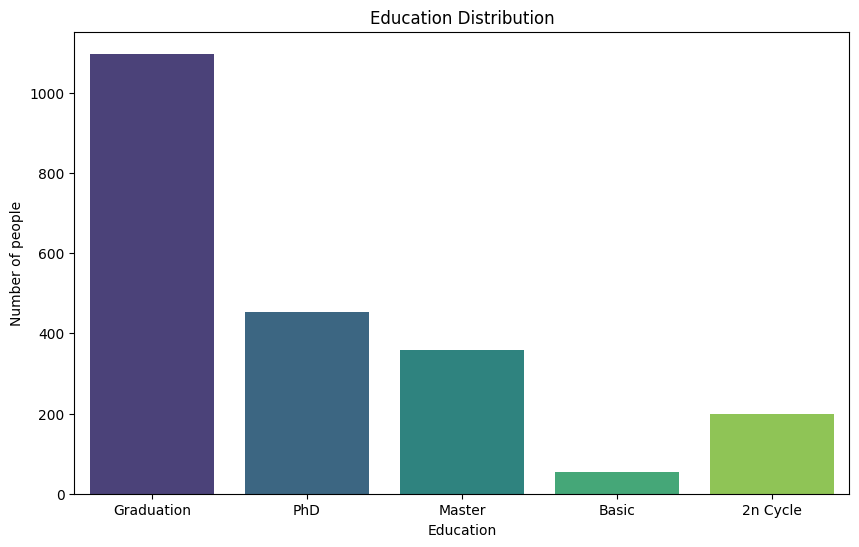

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', palette='viridis')
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.show()

- Most of our participats have a graduation level of education, followed by PhD.

- Minority holds basic level.

### Marital status

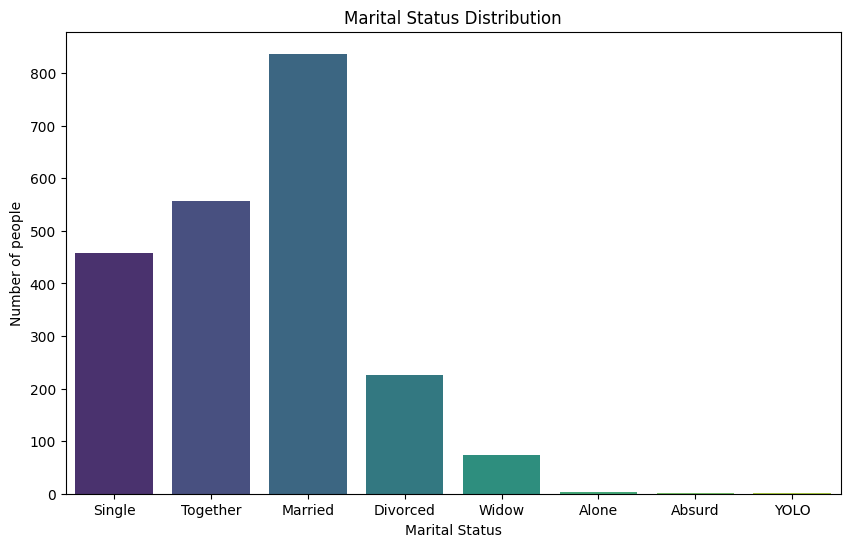

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Marital_Status', palette='viridis')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Number of people')
plt.show()

Majority of the participants is Married.

# Relationships

In [16]:
edu_dummies = pd.get_dummies(df['Education'],dtype=int)
marital_dummies = pd.get_dummies(df['Marital_Status'], dtype = int)


df = pd.concat([df, edu_dummies],axis=1)
df = pd.concat([df, marital_dummies],axis=1)

df.drop(['Education','Marital_Status'], axis = 1, inplace = True)

In [17]:
corr = df.corr(method='pearson')

<Axes: >

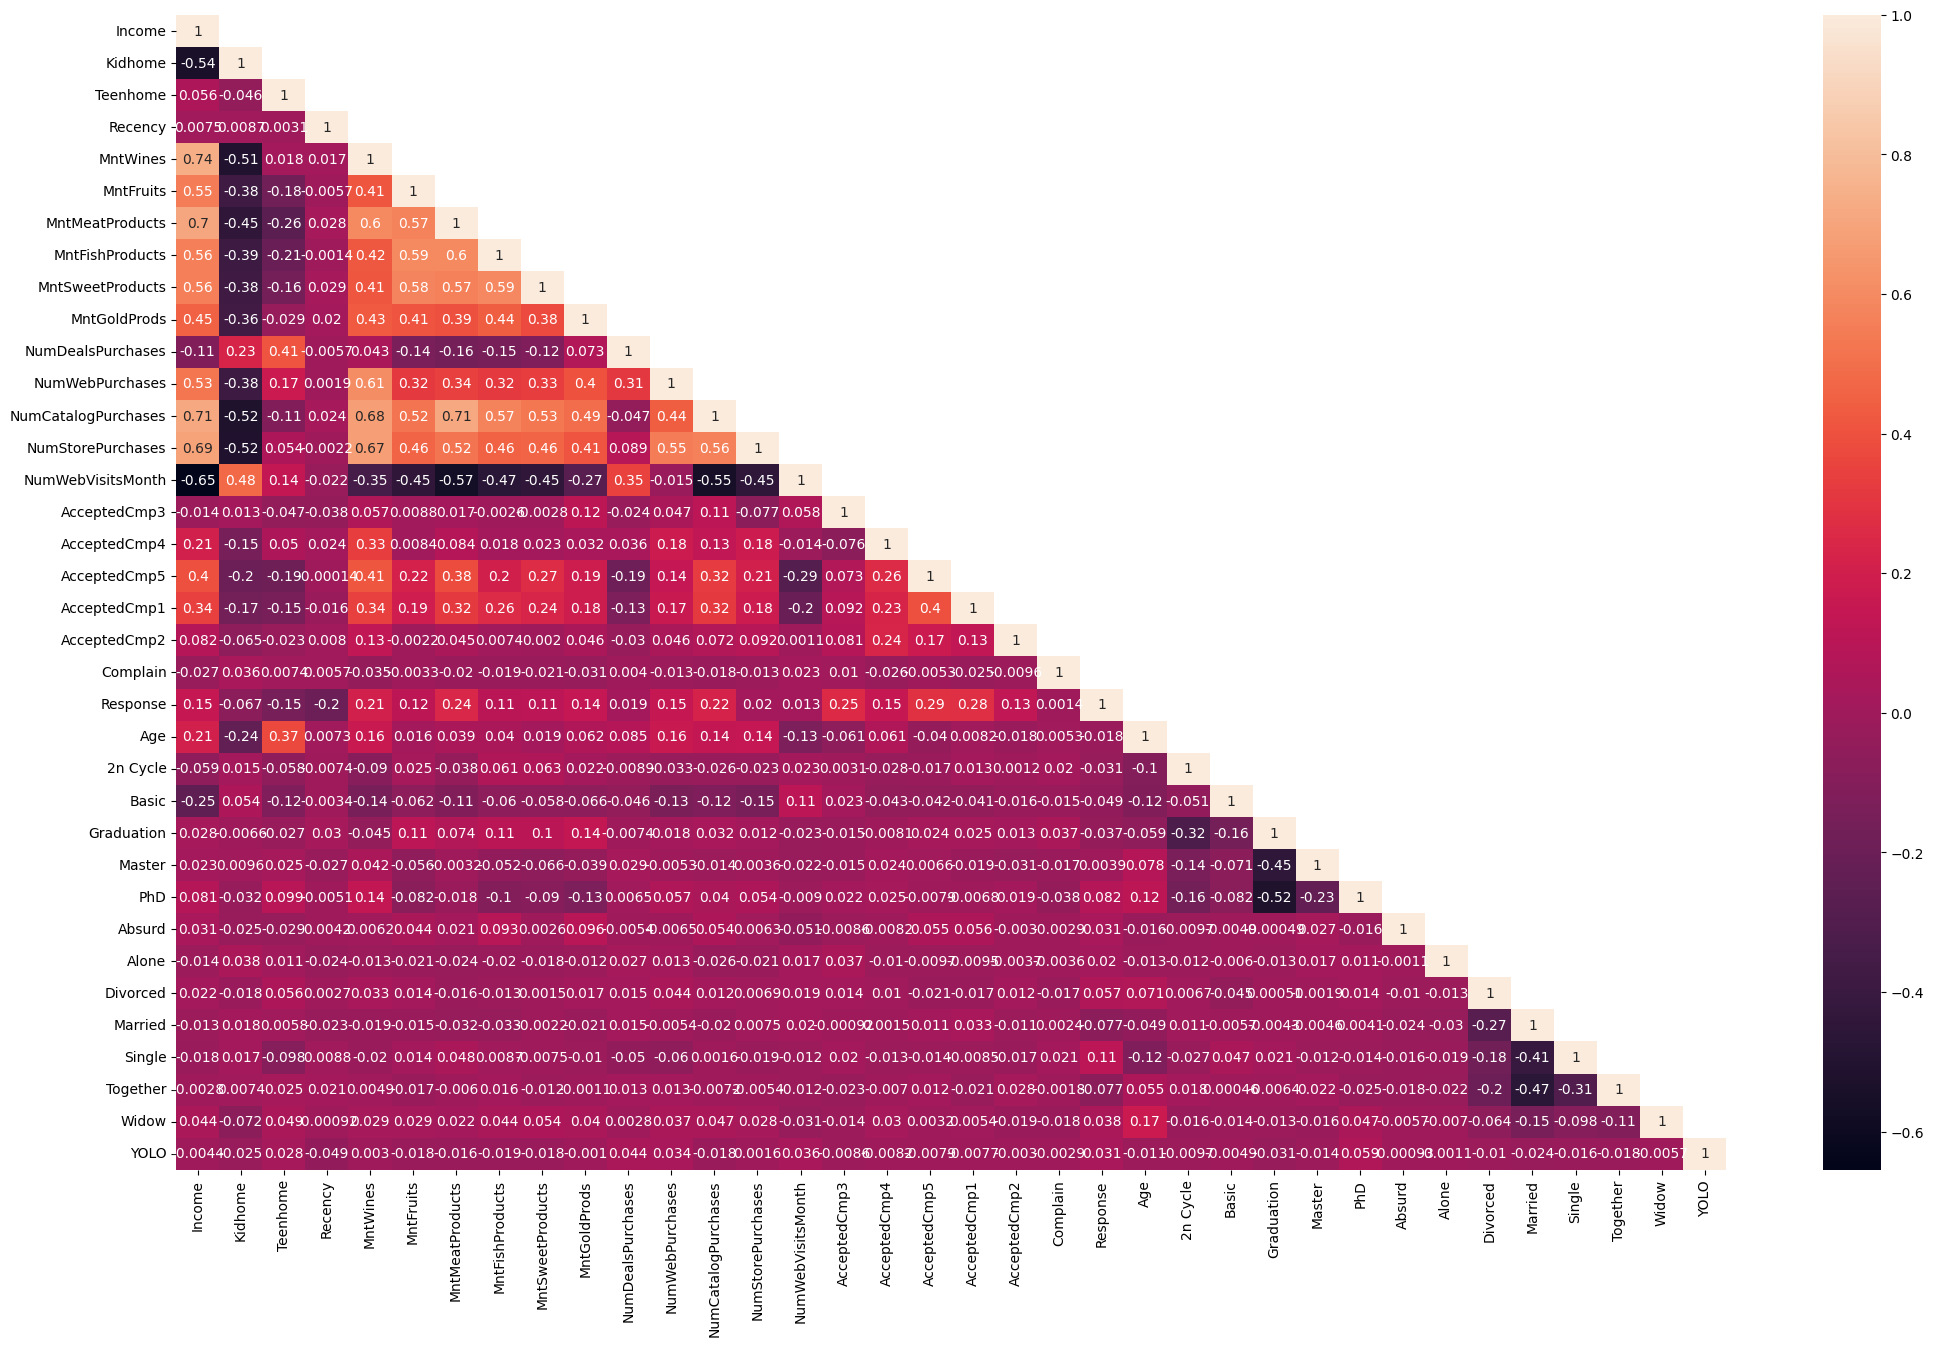

In [18]:
plt.figure(figsize=(25,15))
masker = np.triu(np.ones_like(corr),k=1).astype(dtype = bool)
sns.heatmap(corr,annot=True,mask=masker)

In [19]:
corr.where(masker).unstack().dropna().sort_values()

NumWebVisitsMonth    Income                -0.654700
                     MntMeatProducts       -0.567191
                     NumCatalogPurchases   -0.554133
Kidhome              Income                -0.540311
PhD                  Graduation            -0.522990
                                              ...   
NumStorePurchases    Income                 0.691860
MntMeatProducts      Income                 0.704784
NumCatalogPurchases  Income                 0.709175
                     MntMeatProducts        0.712831
MntWines             Income                 0.738055
Length: 630, dtype: float64

### Strong positive correlation.

Income seems to be positively correlated with most of the features, namely :
- Amount spent on meat products in the last 2 years.
- Number of purchases made using catalog.
- Number of purchases made directly in stores.
- Amount of meat products.

Number of purchases made using catalog is positively correlated with amount spent on meat products in the last 2 years.

### Strong negative correlation.

Income is  negatively correlated with the following features.
- Number of visits to company's web site in the last month.
- Number of small children in customer's household.

Number of visits to company's web site in the last month is negatively correlated with number of purchases made using catalog.

Number of visits to company's web site in the last month is negatively correlated with amount of meat products. 


# Segmentation

In [20]:
df.tail()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
2235,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,0,1,0,0,0,0
2236,64014.0,2,1,56,406,0,30,0,0,8,...,0,1,0,0,0,0,0,1,0,0
2237,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,0,0,0
2238,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,0,0,1,0,0
2239,52869.0,1,1,40,84,3,61,2,1,21,...,0,1,0,0,0,1,0,0,0,0


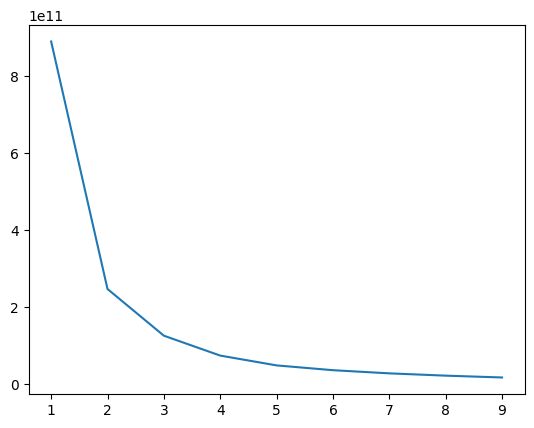

In [21]:
k_range = range(1,10)
sse =[]
for k in k_range:
    km = KMeans(n_clusters=k,n_init=9)
    km.fit(df)
    sse.append(km.inertia_)
plt.plot(k_range,sse)

The data can be grouped into three segments.

In [22]:
km = KMeans(n_clusters=3,n_init=10)

In [23]:
clusters = km.fit_predict(df)

In [24]:
df['cluster'] = clusters

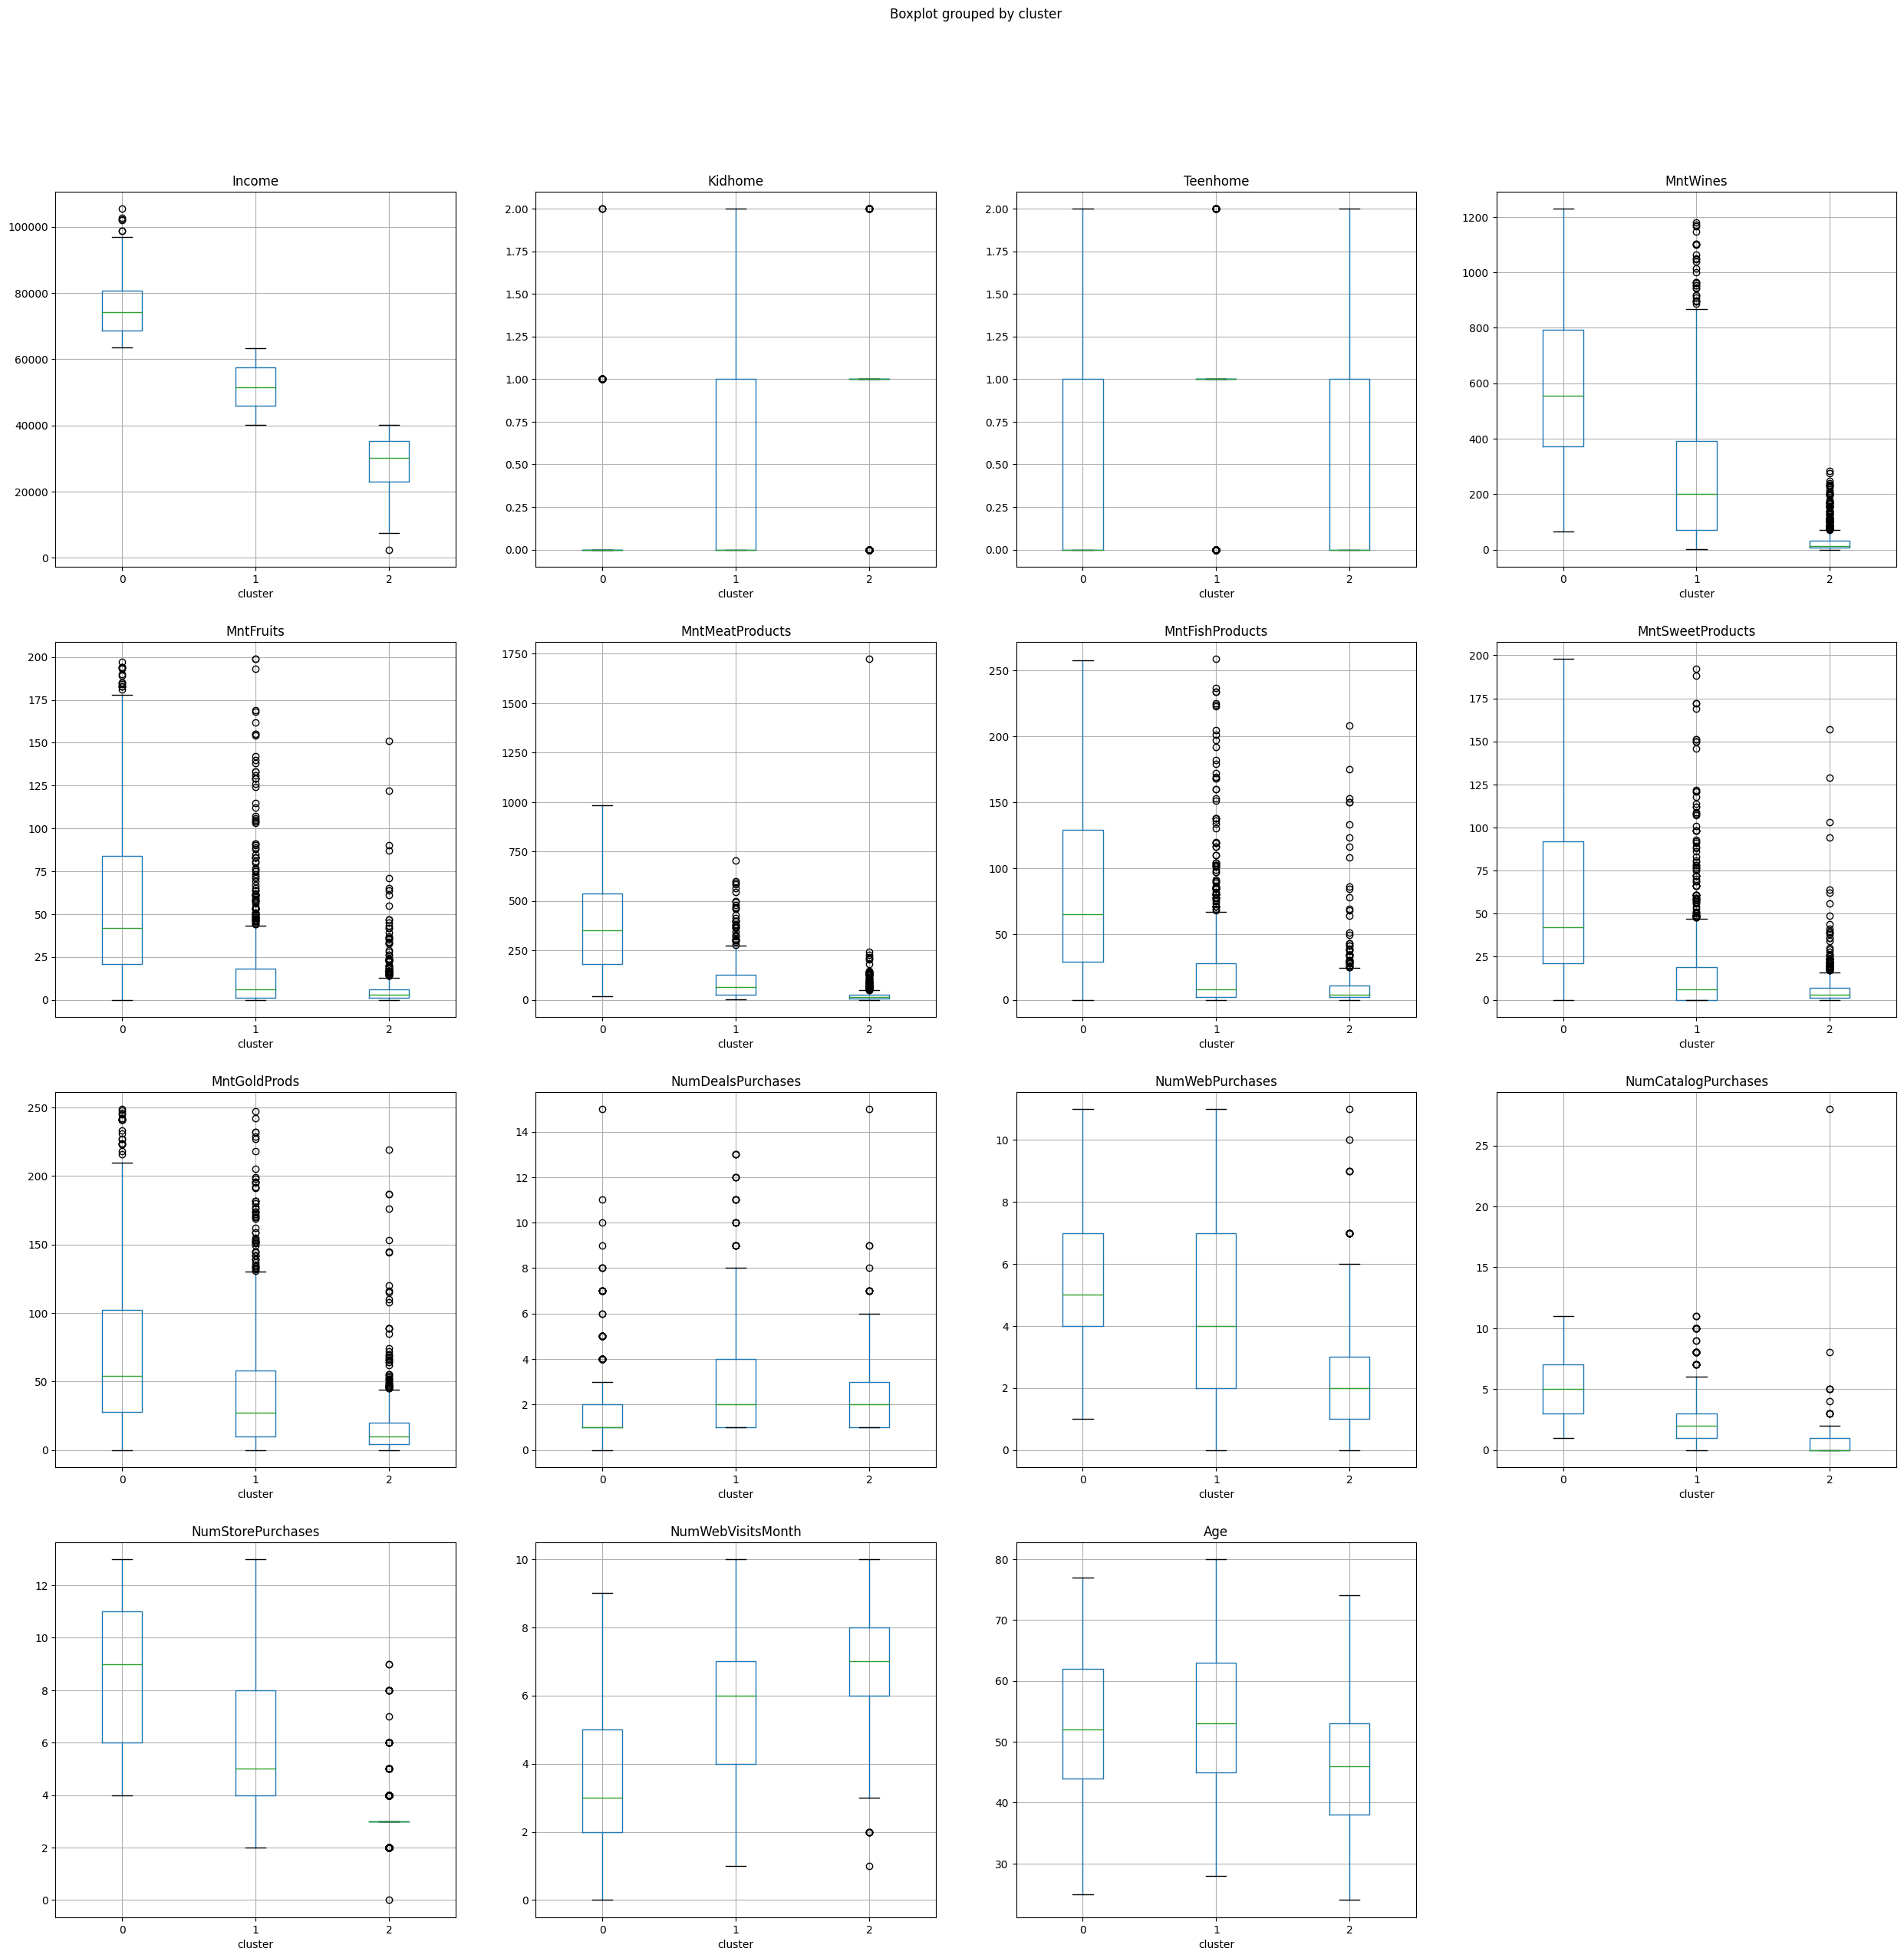

<Figure size 640x480 with 0 Axes>

In [25]:
selected_vars = ['Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age']



fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(30,30))


plt.figure()
for i,column in enumerate(selected_vars):
    row = i // 4
    col = i % 4
    df.boxplot(column, by = 'cluster', ax =axes[row][col])
plt.delaxes(ax=axes[3][3])
plt.tight_layout()
plt.show()

In [26]:
fir_class = df[df['cluster']==0]
sec_class = df[df['cluster']==1]
thir_class = df[df['cluster']==2]

In [27]:
income_class = {'first class' : fir_class, 'second class' : sec_class, 'third class': thir_class}

In [28]:
for i in income_class:
    print(len(income_class[i]), 'age:',round(income_class[i].Age.mean(),0), ', income:', round(income_class[i].Income.mean(),2))

682 age: 52.0 , income: 75220.71
753 age: 54.0 , income: 51720.0
724 age: 47.0 , income: 28604.88


## According to the data above

1st group: 
- Has 682 members.
- Average income 75 220.71
- Average age 52.
- Majority bought wine.
- Majority prefer store purchases.

2nd group:
- Has 724 members 
- Average income 28 604.88
- Average age 47.
- Majority bought wine.
- Majority prefer store purchases.

3rd group:
- Has 753 members
- Average income 51 720.00
- Average age 54.
- Majority bought wine.
- Majority prefer store purchases.
- group visits website the most.

### Model

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [30]:
X = df.drop('Response',axis=1)
y = df['Response']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
models = {
    'logistic' : {
        'model': LogisticRegression(solver='liblinear', random_state=None),
        'params' : { 'C' : [1,10,80,90,100]}
                       },
    'random_forest' : {
        'model' : RandomForestClassifier(random_state=None),
        'params' : {'n_estimators' : [10,20,40,80,90]}
                      },
        'svc' : 
        {
            'model' :  SVC(kernel='rbf', random_state=None),
            'params' : { 'C' : [1,10,80,90]}
                      }
}

models_scores = []

for models,i in models.items():
    print(f'Loading: {models}')
    model = GridSearchCV(i['model'],i['params'],cv=10,return_train_score=False)
    model.fit(X_train, y_train) 
    models_scores.append({'model' : models,
                         'params': model.best_params_,
                        'score': model.best_score_})

Loading: logistic
Loading: random_forest
Loading: svc


In [33]:
pd.DataFrame(models_scores, columns=['model', 'params', 'score'])

,model,params,score
0,logistic,{'C': 10},0.865667
1,random_forest,{'n_estimators': 90},0.882464
2,svc,{'C': 1},0.855239


In [34]:
selected_method = RandomForestClassifier(random_state=None, n_estimators=80)

In [35]:
selected_method.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80)

### Test score

In [36]:
selected_method.score(X_test, y_test)

0.8842592592592593

### Conclusion

Majority were born between the years 1955 and 1965, 50% of the population earn around 50 000. 
Most of our participats have a graduation level of education and most of the participants are Married.
In terms of behaviour, majority prefer wine and to purchase directly in store.